In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.interpolate
import random

In [2]:
def get_r1p4(MRL_table):
    max_index = np.argmax(MRL_table[:,0])
    clipped_MRL = MRL_table[:max_index-1,:]
        
    diffMRL = np.ediff1d(clipped_MRL[:,0])
    drop_in_m = np.argmax(diffMRL < 0) # index of first drop in mass
    above_m = np.argmax(clipped_MRL[:,0]>clipped_MRL[drop_in_m,0])
    
    keep = np.zeros(clipped_MRL[:,0].shape[0], dtype=bool)
    for i in range(clipped_MRL[:,0].shape[0]):
        keep[i] = i < drop_in_m or i > above_m
        
    fixed_MRL = clipped_MRL[keep,:]
    r_func = scipy.interpolate.CubicSpline(fixed_MRL[:,0], fixed_MRL[:,1])
    r1p4 = r_func(1.4)
    
    return r1p4

In [3]:
ext_type = 'cs'
nsamp = 5

EOSdir_name = ext_type+str(nsamp)+'EOS'
MRLdir_name = ext_type+str(nsamp)+'MRL'
datapath = os.getcwd() + "/data/"

numlist = []
num_eos, num_mrl = 0, 0
for file in os.listdir(datapath+EOSdir_name):
        if '.dat' in file:
            numlist.append(int(file[:-4]))
            num_eos += 1
            
for file in os.listdir(datapath+MRLdir_name):
        if '.dat' in file:
            numlist.append(int(file[:-4]))
            num_mrl += 1

In [23]:
r1p4 = np.zeros((num_eos,2))

for i in range(num_eos):
    file = datapath+MRLdir_name+'/'+str(i)+'.dat'
    MRL = np.loadtxt(file)

    r1p4[i,0] = get_r1p4(MRL)
    r1p4[i,1] = i
    
sorted_index = np.argsort(r1p4[:,0])
r1p4_sort = r1p4[sorted_index,:]

In [143]:
n_EOS = 3250
n_bins = 50
n_per_bin = int(n_EOS/n_bins)

r_min = r1p4_sort[0,0]
r_max = r1p4_sort[-1,0]
delr = (r_max-r_min)/n_bins
print(delr)

bins = np.arange(r_min, r_max, delr)

0.06529619847244267


In [144]:
uniform_r1p4 = np.empty((0,2))

for i in range(n_bins):
    # make R range for bin
    lbound = r_min + i*delr
    ubound = r_min + (i+1)*delr
    # bool array to get sample set
    in_range = np.logical_and(r1p4_sort[:,0] >= lbound,r1p4_sort[:,0] <= ubound)
    sample_set = r1p4_sort[in_range,:]
    
    if sample_set.shape[0] > n_per_bin:
        size = int(sample_set.shape[0])
        zero2size = np.arange(0,size,1)
        rints = np.random.choice(zero2size, size=n_per_bin, replace=False)
        in_sample = np.zeros(size, dtype=bool)
        for j in range(size):
            in_sample[j] = zero2size[j] in rints
        sample = sample_set[in_sample,:]
        
        uniform_r1p4 = np.append(uniform_r1p4, sample, axis=0)
        
    else:
        uniform_r1p4 = np.append(uniform_r1p4, sample_set, axis=0)

Text(0.5, 1.0, 'Uniform Distribution')

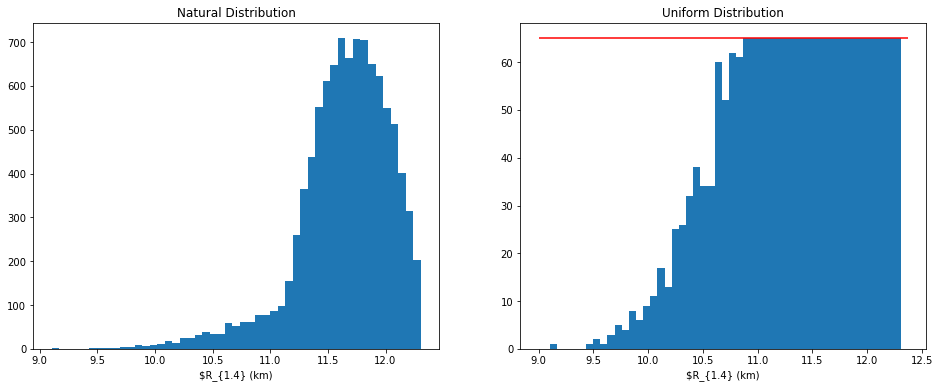

In [145]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

ax[0].hist(r1p4[:,0], bins=bins)
ax[0].set_xlabel('$R_{1.4} (km)')
ax[0].set_title("Natural Distribution")

plt.hist(uniform_r1p4[:,0], bins=bins)
plt.hlines(n_per_bin, xmin=9, xmax=r_max, color='r')
ax[1].set_xlabel('$R_{1.4} (km)')
ax[1].set_title("Uniform Distribution")

In [146]:
uniform_r1p4.shape

(2000, 2)